# ADS-508 Project Notebook

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import boto3
import sagemaker
import csv
import pandas as pd

In [6]:
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sagemaker_session.default_bucket()
region = boto3.Session().region_name

sm = boto3.Session().client(service_name="sagemaker", region_name=region)

## Import
### Importing Data from S3 Bucket

In [7]:
!aws s3 cp --recursive s3://aurelia-resort-data/ ./data/

download: s3://aurelia-resort-data/airbnb/neighbourhoods.csv to data/airbnb/neighbourhoods.csv
download: s3://aurelia-resort-data/income/disp_income.csv to data/income/disp_income.csv
download: s3://aurelia-resort-data/airbnb/listings.csv to data/airbnb/listings.csv
download: s3://aurelia-resort-data/travel/airline_2018.csv to data/travel/airline_2018.csv
download: s3://aurelia-resort-data/travel/airline_2017.csv to data/travel/airline_2017.csv
download: s3://aurelia-resort-data/travel/airline_2016.csv to data/travel/airline_2016.csv
download: s3://aurelia-resort-data/travel/airline_2020.csv to data/travel/airline_2020.csv
download: s3://aurelia-resort-data/travel/airline_2019.csv to data/travel/airline_2019.csv
download: s3://aurelia-resort-data/airbnb/reviews.csv to data/airbnb/reviews.csv
download: s3://aurelia-resort-data/travel/airline_2022.csv to data/travel/airline_2022.csv
download: s3://aurelia-resort-data/travel/airline_data_archived.csv to data/travel/airline_data_archived.c

### Ingesting Data via Pandas

In [8]:
airline = pd.concat(
    map(pd.read_csv, ["./data/travel/airline_2022.csv", "./data/travel/airline_2021.csv",
                     "./data/travel/airline_2020.csv", "./data/travel/airline_2019.csv",
                     "./data/travel/airline_2018.csv", "./data/travel/airline_2017.csv", 
                     "./data/travel/airline_2016.csv"]),
    ignore_index=True)

tripsurvey = pd.read_csv("./data/travel/trip_data2.csv")

airbnb_neigh = pd.read_csv("./data/airbnb/neighbourhoods.csv")

airbnb_reviews = pd.read_csv("./data/airbnb/reviews.csv")

## EDA

### Data Shapes

In [9]:
airline.shape

(1741433, 12)

In [10]:
tripsurvey.shape

(134148, 19)

In [11]:
airbnb_neigh.shape

(39, 2)

In [12]:
airbnb_reviews.shape

(321578, 6)

### Data Previews

In [13]:
airline.head(5)

,PASSENGERS,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,ORIGIN_WAC,DEST,DEST_CITY_NAME,DEST_STATE_NM,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
0,0.0,"Aberdeen, SD",South Dakota,67,FSD,"Sioux Falls, SD",South Dakota,2022,1,1,1,G
1,0.0,"Aberdeen, SD",South Dakota,67,FSD,"Sioux Falls, SD",South Dakota,2022,1,2,1,G
2,0.0,"Aberdeen, SD",South Dakota,67,FSD,"Sioux Falls, SD",South Dakota,2022,1,3,1,G
3,0.0,"Aberdeen, SD",South Dakota,67,FSD,"Sioux Falls, SD",South Dakota,2022,2,4,1,G
4,0.0,"Aberdeen, SD",South Dakota,67,FSD,"Sioux Falls, SD",South Dakota,2022,2,5,1,G


In [63]:
tripsurvey.head(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Year,Month,PercentofTravelers
0,County,2019-01-01,1.0,AL,1001.0,Autauga County,8153.774194,47715.225806,185406.548387,39861.032258,...,26100.806452,35098.322581,8192.870968,3177.580645,1724.967742,317.225806,53.225806,2019,01,85.405548
1,County,2019-01-01,1.0,AL,1003.0,Baldwin County,35464.903226,187769.096774,682047.000000,132886.967742,...,119877.483871,113967.483871,36454.580645,8091.838710,3796.709677,1762.451613,533.774194,2019,01,84.113126
2,County,2019-01-01,1.0,AL,1005.0,Barbour County,3746.483871,20939.516129,85555.322581,17446.741935,...,15250.322581,11596.193548,5833.612903,3003.161290,699.709677,176.387097,28.838710,2019,01,84.823447
3,County,2019-01-01,1.0,AL,1007.0,Bibb County,2858.645161,19535.354839,78483.967742,15839.451613,...,11619.709677,10237.193548,8677.225806,1930.419355,652.064516,179.935484,27.225806,2019,01,87.234772
4,County,2019-01-01,1.0,AL,1009.0,Blount County,7649.967742,50176.032258,192921.903226,35455.677419,...,30827.935484,35365.612903,21713.548387,4961.677419,1735.064516,443.741935,73.225806,2019,01,86.770713


In [15]:
airbnb_neigh.head(5)

,neighbourhood_group,neighbourhood
0,NaN,"Brightwood Park, Crestwood, Petworth"
1,NaN,"Brookland, Brentwood, Langdon"
2,NaN,"Capitol Hill, Lincoln Park"
3,NaN,"Capitol View, Marshall Heights, Benning Heights"
4,NaN,"Cathedral Heights, McLean Gardens, Glover Park"


In [16]:
airbnb_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,3686,150766,2010-12-08,255888,Patrick,"Vita is a very welcoming, helpful and friendly..."
2,3686,177749,2011-02-02,366688,Benjamin,"This was my first time using ""airbnb"" and it m..."
3,3686,197451,2011-03-12,213492,T.J.,"First, Vita saved my work week by providing me..."
4,3686,213212,2011-03-30,428455,Pete,Great host! Very welcoming and organised. I st...


## Relevant Data Filtering

In [17]:
## Filter data to where DC is destination city

airline = airline[airline["DEST_CITY_NAME"].str.contains("DC")]

## Filter data to where passengers > 0

airline = airline[airline["PASSENGERS"]>0]


In [18]:
airline.shape

(36142, 12)

### Summary Statistics

In [19]:
airline.describe()

,PASSENGERS,ORIGIN_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP
count,36142.000000,36142.000000,36142.000000,36142.000000,36142.000000,36142.000000
mean,3427.064247,45.166842,2019.253860,2.530297,6.597366,1.967987
std,6020.063710,23.186547,2.258555,1.117391,3.453505,1.284688
min,1.000000,1.000000,2016.000000,1.000000,1.000000,1.000000
25%,181.000000,33.000000,2017.000000,2.000000,4.000000,1.000000
50%,1427.000000,38.000000,2019.000000,3.000000,7.000000,2.000000
75%,3889.000000,63.000000,2022.000000,4.000000,10.000000,2.000000
max,63773.000000,93.000000,2022.000000,4.000000,12.000000,10.000000


In [20]:
tripsurvey.describe()

,State FIPS,County FIPS,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
count,134106.000000,131964.000000,1.336460e+05,1.336460e+05,1.336460e+05,1.336460e+05,1.336460e+05,1.336460e+05,1.336460e+05,1.336460e+05,1.336460e+05,1.336460e+05,1.336460e+05,1.336460e+05,1.336460e+05
mean,30.259004,30383.649268,6.799655e+04,2.408609e+05,1.143412e+06,2.957016e+05,2.814124e+05,1.386192e+05,1.753689e+05,1.690744e+05,5.450161e+04,1.816385e+04,7.646022e+03,1.644634e+03,1.279698e+03
std,15.151581,15160.152747,1.330054e+06,4.615650e+06,2.236335e+07,5.815983e+06,5.505153e+06,2.712604e+06,3.436352e+06,3.315083e+06,1.061576e+06,3.527857e+05,1.495533e+05,3.223122e+04,2.764918e+04
min,1.000000,1001.000000,1.530000e+01,1.440000e+02,3.888077e+02,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,18.000000,18177.000000,2.042694e+03,9.157815e+03,4.223223e+04,8.969900e+03,9.345669e+03,4.166952e+03,5.741245e+03,6.798098e+03,3.418032e+03,1.257504e+03,4.285750e+02,6.240484e+01,1.767742e+01
50%,29.000000,29176.000000,4.890494e+03,2.175117e+04,1.017115e+05,2.232086e+04,2.471940e+04,1.159690e+04,1.443124e+04,1.610431e+04,7.151935e+03,2.678613e+03,9.456887e+02,1.599032e+02,5.390323e+01
75%,45.000000,45081.000000,1.452453e+04,5.955001e+04,2.807688e+05,6.498667e+04,7.141383e+04,3.452723e+04,4.197851e+04,4.260267e+04,1.659802e+04,5.990772e+03,2.293331e+03,4.257703e+02,2.035351e+02
max,56.000000,56045.000000,9.490396e+07,2.660413e+08,1.476327e+09,4.037645e+08,3.741627e+08,1.845964e+08,2.368210e+08,2.354150e+08,7.117779e+07,2.180353e+07,1.019972e+07,2.456013e+06,3.325570e+06


### Data Types and Info

In [21]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36142 entries, 46321 to 1741254
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PASSENGERS        36142 non-null  float64
 1   ORIGIN_CITY_NAME  36142 non-null  object 
 2   ORIGIN_STATE_NM   36142 non-null  object 
 3   ORIGIN_WAC        36142 non-null  int64  
 4   DEST              36142 non-null  object 
 5   DEST_CITY_NAME    36142 non-null  object 
 6   DEST_STATE_NM     36142 non-null  object 
 7   YEAR              36142 non-null  int64  
 8   QUARTER           36142 non-null  int64  
 9   MONTH             36142 non-null  int64  
 10  DISTANCE_GROUP    36142 non-null  int64  
 11  CLASS             36142 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 3.6+ MB


In [22]:
tripsurvey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134148 entries, 0 to 134147
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Level                           134148 non-null  object 
 1   Date                            134148 non-null  object 
 2   State FIPS                      134106 non-null  float64
 3   State Postal Code               134106 non-null  object 
 4   County FIPS                     131964 non-null  float64
 5   County Name                     131964 non-null  object 
 6   Population Staying at Home      133646 non-null  float64
 7   Population Not Staying at Home  133646 non-null  float64
 8   Number of Trips                 133646 non-null  float64
 9   Number of Trips <1              133646 non-null  float64
 10  Number of Trips 1-3             133646 non-null  float64
 11  Number of Trips 3-5             133646 non-null  float64
 12  Number of Trips 

### Missing Data

In [ ]:
print(f'\nMissing Data:\n{airline.isnull().sum()}')

print('\nTotal Missing Data:', airline.isnull().sum().sum())

In [ ]:
print(f'\nMissing Data:\n{tripsurvey.isnull().sum()}')

print('\nTotal Missing Data:', tripsurvey.isnull().sum().sum())

### Feature Construction: Create Date Columns

In [23]:
#Airline has year and month, needs date

airline['DATE'] = pd.to_datetime(airline[['YEAR', 'MONTH']].assign(DAY=1))

In [27]:
#Trip survey has month, needs year and date to be formatted as date

tripsurvey['Year'] = tripsurvey['Date'].str.split("/").str[0]

tripsurvey['Month'] = tripsurvey['Date'].str.split("/").str[1]

tripsurvey['Date'] = pd.to_datetime(tripsurvey[['Year', 'Month']].assign(DAY=1))


### Feature Construction: % of People Who Traveled

In [62]:
tripsurvey['PercentofTravelers'] = (tripsurvey['Population Not Staying at Home']/(tripsurvey['Population Not Staying at Home']+tripsurvey['Population Staying at Home']))*100

### Group Data by Year and Month

In [47]:
#Group number of flights over time from airline data

airline_grouped_flights = airline.groupby(['DATE'], as_index=False)['YEAR'].count()
airline_grouped_flights = airline_grouped_flights.rename(columns={"YEAR": "TRIPS"})
airline_grouped_flights.head()

,DATE,TRIPS
0,2016-01-01,428
1,2016-02-01,421
2,2016-03-01,420
3,2016-04-01,441
4,2016-05-01,427


In [39]:
#Group total passengers over time from airline data

airline_grouped_passengers = airline.groupby(['DATE'], as_index=False)['PASSENGERS'].sum()
airline_grouped_passengers.head()

,DATE,PASSENGERS
0,2016-01-01,1208852.0
1,2016-02-01,1228611.0
2,2016-03-01,1560148.0
3,2016-04-01,1562835.0
4,2016-05-01,1683873.0


In [55]:
#Group population traveling from survey data

tripsurvey_grouped_travelers = tripsurvey.groupby(['Date'], as_index=False)['Population Not Staying at Home'].sum()
tripsurvey_grouped_travelers = tripsurvey_grouped_travelers.rename(columns={"Population Not Staying at Home": "Travelers"})
tripsurvey_grouped_travelers.head()

,Date,Travelers
0,2019-01-01,7.915365e+08
1,2019-02-01,7.945863e+08
2,2019-03-01,7.911408e+08
3,2019-04-01,7.880608e+08
4,2019-05-01,7.942675e+08


In [66]:
#Group population traveling from survey data

tripsurvey_grouped_travelerperc = tripsurvey.groupby(['Date'], as_index=False)['PercentofTravelers'].mean()
tripsurvey_grouped_travelerperc.head()

,Date,PercentofTravelers
0,2019-01-01,81.424641
1,2019-02-01,81.755145
2,2019-03-01,81.773040
3,2019-04-01,81.328957
4,2019-05-01,81.861388


In [56]:
#Group total number of trips from survey data

tripsurvey_grouped_trips_sum = tripsurvey.groupby(['Date'], as_index=False)['Number of Trips'].sum()
tripsurvey_grouped_trips_sum = tripsurvey_grouped_trips_sum.rename(columns={"Number of Trips": "Trips"})
tripsurvey_grouped_trips_sum.head()

,Date,Trips
0,2019-01-01,3.411167e+09
1,2019-02-01,3.446040e+09
2,2019-03-01,3.919756e+09
3,2019-04-01,4.340727e+09
4,2019-05-01,4.245221e+09


In [57]:
#Group average number of trips from survey data

tripsurvey_grouped_trips_avg = tripsurvey.groupby(['Date'], as_index=False)['Number of Trips'].mean()
tripsurvey_grouped_trips_avg = tripsurvey_grouped_trips_avg.rename(columns={"Number of Trips": "Trips"})
tripsurvey_grouped_trips_avg.head()

,Date,Trips
0,2019-01-01,1.071010e+06
1,2019-02-01,1.081280e+06
2,2019-03-01,1.230306e+06
3,2019-04-01,1.364580e+06
4,2019-05-01,1.332043e+06


### Visualize Data over Time

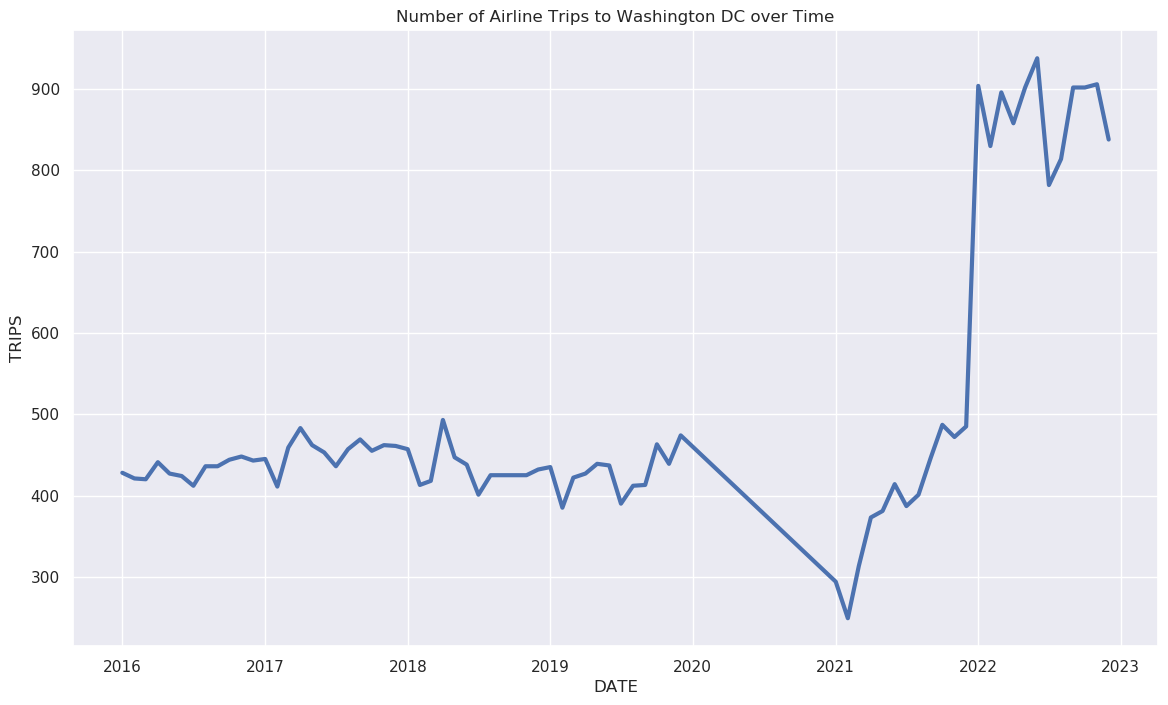

In [51]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=airline_grouped_flights, x ='DATE', y = 'TRIPS', palette='viridis', lw=3)
plt.title("Number of Airline Trips to Washington DC over Time")
plt.show()

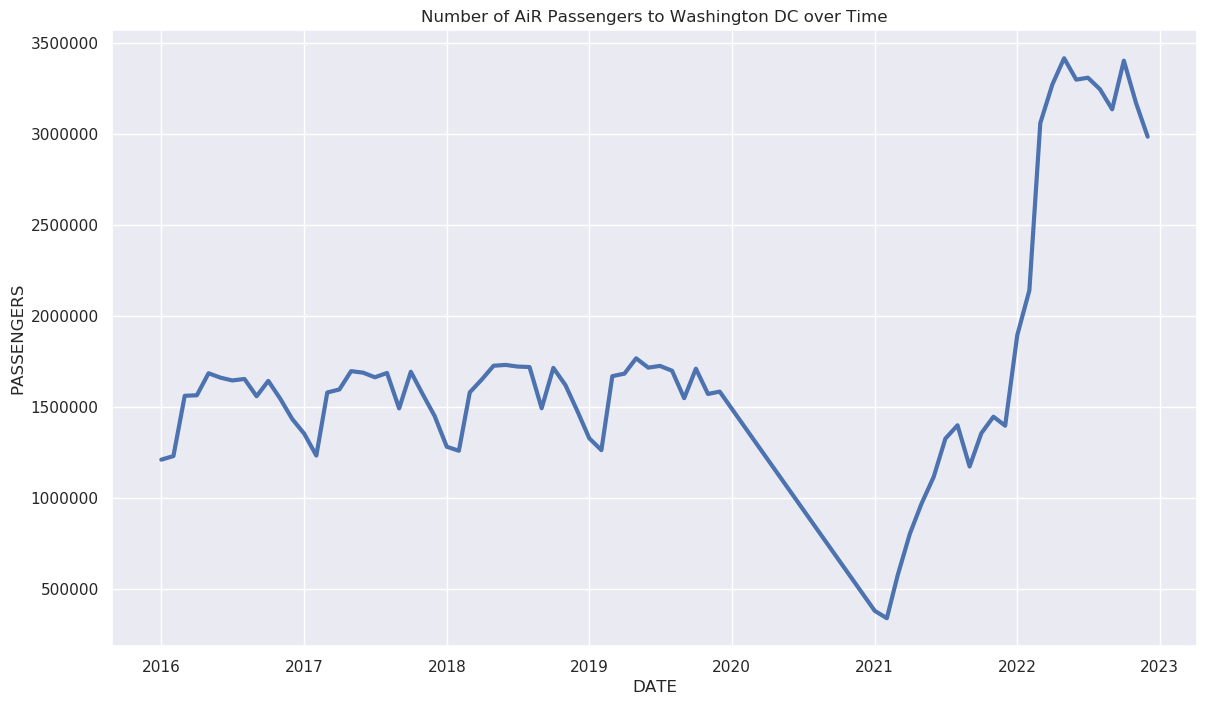

In [53]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=airline_grouped_passengers, x ='DATE', y = 'PASSENGERS', palette='viridis', lw=3)
plt.title("Number of Air Passengers to Washington DC over Time")
plt.show()

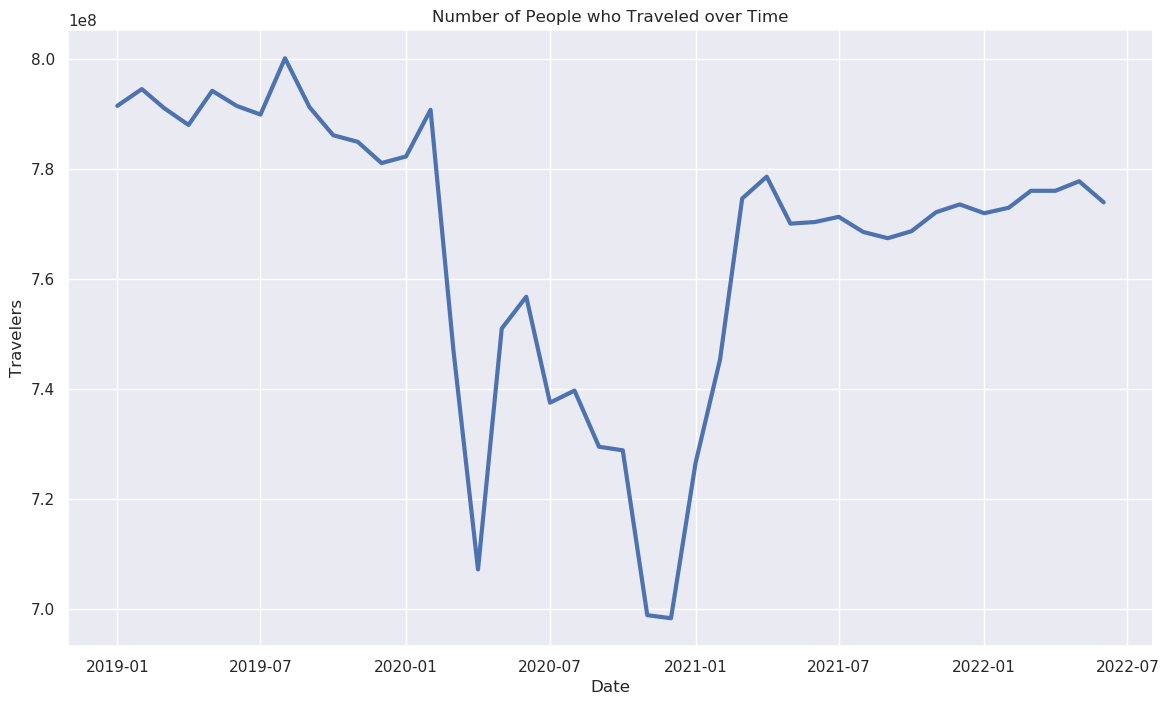

In [58]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=tripsurvey_grouped_travelers, x ='Date', y = 'Travelers', palette='viridis', lw=3)
plt.title("Number of People who Traveled over Time")
plt.show()

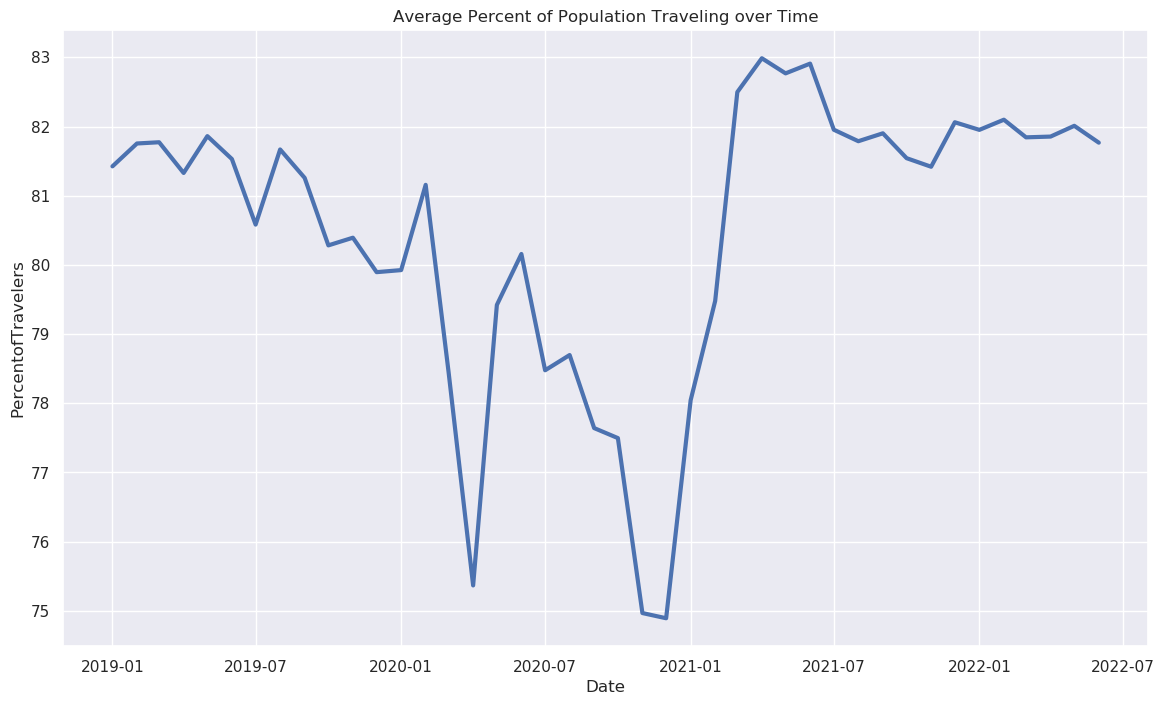

In [69]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=tripsurvey_grouped_travelerperc, x ='Date', y = 'PercentofTravelers', palette='viridis', lw=3)
plt.title("Average Percent of Population Traveling over Time")
plt.show()

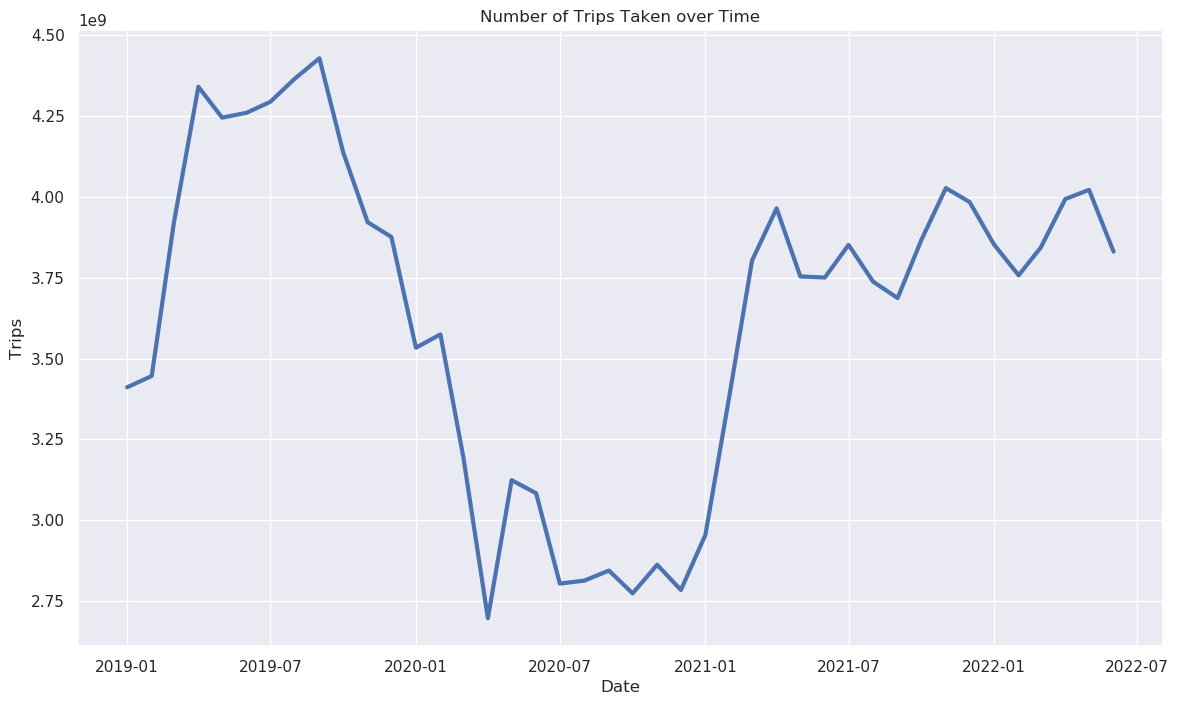

In [59]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=tripsurvey_grouped_trips_sum, x ='Date', y = 'Trips', palette='viridis', lw=3)
plt.title("Number of Trips Taken over Time")
plt.show()

### Join Data in Singular DF

## Release Resources

In [ ]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [ ]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}